### Exploring Speed Dating Data
Created by Ricardo Lu

DASC Capstone project

Apr 19 2020



## About the data:

Data was gathered from 552 participants (only 452 are in the controlled group the data that I can use) ating events from 2002-2004.
During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex.
At the end of their four minutes, participants were asked if they would like to see their date again. 

Columns that I can use:

1.Personal ID
2.Race
3.Same race rate
4.Gender
5.Match rate


## Hypothesis and questions
I have taken Race and Racism and Intersectionality class and I am going to take sociology of sexuality class next semester. I am interested about the result how intersected identities effects their result whether to get the second date.

From the previous reading and knowledge in Sociology, I have the hypothesis that Asian man and Black women would have identity conflicts. In a speed dating setting with 4 minutes of interaction, does match rate of Asian man, black men & women significantly different from that of white men? If yes, how does the difference look like?


## 1. Import and Install Packages

In [ ]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# import Python packages
import pandas as pd #data handling library (dataframes)
import seaborn as sns #visualization library
import matplotlib #visualization library
import matplotlib.pyplot as plt #visualization library

# linear regression packages
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

#more visualization packages using Plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#this code will format the output of float variables
pd.options.display.float_format = '{:,.3f}'.format


In [ ]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 1000 #handy for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

!pip install researchpy
import researchpy as rp
from scipy import stats

## Import Data & Data Cleaning

In [ ]:
#import Speed Dating Data
Dating = pd.read_csv('/content/drive/My Drive/Data Science Project/Speed Dating Data.csv',encoding="latin1")

In [ ]:
#group by each person's individual IDs, take the means of the perceptions
Dating1=Dating.groupby("iid").mean().reset_index()
Dating1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Columns: 187 entries, iid to amb5_3
dtypes: float64(186), int64(1)
memory usage: 805.1 KB


In [ ]:
#Select only first 17 waves
#17-21 is not controlled
Dating2=Dating1[Dating1["wave"]<18]
Dating2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Columns: 187 entries, iid to amb5_3
dtypes: float64(186), int64(1)
memory usage: 663.9 KB


In [ ]:
Dating_clean=Dating2[["iid","wave","gender","race","match","samerace","age"]].dropna()
Dating_clean[["race"]].astype(dtype=int)
Dating_clean.head(12)

,iid,wave,gender,race,match,samerace,age
0,1,1.000,0.000,4.000,0.400,0.100,21.000
1,2,1.000,0.000,2.000,0.200,0.800,24.000
2,3,1.000,0.000,2.000,0.000,0.800,25.000
3,4,1.000,0.000,2.000,0.200,0.800,23.000
4,5,1.000,0.000,2.000,0.200,0.800,21.000
5,6,1.000,0.000,4.000,0.200,0.100,23.000
6,7,1.000,0.000,4.000,0.200,0.100,22.000
7,8,1.000,0.000,2.000,0.800,0.800,25.000
8,9,1.000,0.000,6.000,0.700,0.000,26.000
9,10,1.000,0.000,2.000,0.200,0.800,26.000


In [ ]:
Dating_clean.isna().sum()

iid         0
wave        0
gender      0
race        0
match       0
samerace    0
age         0
dtype: int64

## Prediction

### Linear Regression for prediction

First of all, I try to predict match rate using gender, same-race rate and age.

In [ ]:
# defining X and Y
#Assign X a set of data, gender, samerace, age
features_list = ["gender","samerace","age"]
X = Dating_clean[features_list]
#Assign Y at the response variable
Y = Dating_clean["match"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
linreg=LinearRegression() # assign a linear regression
linreg.fit(X_train,Y_train) # fit model to train data
Y_pred=linreg.predict(X_test)

print("Model intercept:", linreg.intercept_)
coef=list(zip(features_list,linreg.coef_)) # combine the slope and the features list together
print("Model slope:", coef)

#r2=r2_score(Y_test, Y_pred, multioutput='variance_weighted')
print("Variance Score:",linreg.score(X_test, Y_test))

Model intercept: 0.35080553074804344
Model slope: [('gender', 0.016114879679751632), ('samerace', -0.028911969781272858), ('age', -0.006917365766619946)]
Variance Score: -0.09505914840341734


### Dummy Coding & Race as a predicter

Second, I try to dummy code racial rategories to predict match rate.

In [ ]:
#Dummy Coding; I assigned European/Caucasian-American as the baseline since their number is the most in the sample
Dating_clean["race_Black/African American"]=Dating_clean.race.map({1:1,2:0,3:0, 4:0, 5:0, 6:0})
Dating_clean["race_European/Caucasian-American"]=Dating_clean.race.map({1:0,2:1,3:0, 4:0, 5:0, 6:0})
Dating_clean["race_Latino/Hispanic American"]=Dating_clean.race.map({1:0,2:0,3:1, 4:0, 5:0, 6:0})
Dating_clean["race_Asian/Pacific Islander/Asian-American"]=Dating_clean.race.map({1:0,2:0,3:0, 4:1, 5:0, 6:0})
Dating_clean["race_Native American"]=Dating_clean.race.map({1:0,2:0,3:0, 4:0, 5:1, 6:0})
Dating_clean["race_Other"]=Dating_clean.race.map({1:0,2:0,3:0, 4:0, 5:0, 6:1})

In [ ]:
features_list = ["gender","race_Black/African American","race_European/Caucasian-American","race_Latino/Hispanic American",
                 "race_Asian/Pacific Islander/Asian-American","race_Other","age"]
X = Dating_clean[features_list]
#Assign Y at the response variable
Y = Dating_clean["match"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
linreg=LinearRegression() # assign a linear regression
linreg.fit(X_train,Y_train) # fit model to train data
Y_pred=linreg.predict(X_test)

print("Model intercept:", linreg.intercept_)
coef=list(zip(features_list,linreg.coef_)) # combine the slope and the features list together
print("Model slope:", coef)

# r2=r2_score(Y_test, Y_pred, multioutput='variance_weighted')
print("Variance Score:",linreg.score(X_test, Y_test))

Model intercept: 0.3577563230605821
Model slope: [('gender', -0.004431899488693768), ('race_Black/African American', 0.0054380977716950805), ('race_European/Caucasian-American', -0.01390456246107797), ('race_Latino/Hispanic American', 0.054247300592108645), ('race_Asian/Pacific Islander/Asian-American', -0.061168486258957724), ('race_Other', 0.015387650356231977), ('age', -0.006293660630699505)]
Variance Score: 0.004671305801194348


### Summary
The variance score is not very high, it is too close to 0. 

However, age is always a negative in both slopes, which indicate that the older people went to speed dating, the less change people get the match.


## Visualization

### Reframed hypothsis
I made an assumption through preveious study that Black women and Asian men tend to be the least attractive (Data through online dating website called OkCubid) 
I want to challenge this assumption to see the result after 4 minutes of interaction through speed dating analysis.

### Population by Gender and Race

In [ ]:
Dating_revised_1=rp.summary_cont(Dating_clean.groupby(by=["race_Name","gender_Name"])["match"]).reset_index()
Dating_revised_1.columns

Index(['race_Name', 'gender_Name', 'N', 'Mean', 'SD', 'SE', '95% Conf.',
       'Interval'],
      dtype='object')

In [ ]:
fig = px.bar(Dating_revised_1, x='race_Name', y='N', 
             color='gender_Name', barmode='group',labels={'N':'Number of Participants','race_Name':'Race'})
fig.update_layout(title='Number of Participants by Gender and Race')

### Reframed hypothsis 2
My hypothesis requires me to compare Asian men & Black Women with white men & women. However, the popultion of black women is very low in this experiement. I won't get good comparason with that amount of data. So, I decide to reframe the hypothesis again:

Does match rate of Asian man different from that of white men? If yes, how does the difference look like?

### Match rate of each racial categories

In [ ]:
Race_match=Dating_clean[["race","match"]].groupby(by="race").mean().reset_index("race")
Race_match[["race"]].astype(dtype=int)
Race_match["race_Name"]=("Black/African American","European/Caucasian-American","Latino/Hispanic American","Asian/Pacific Islander/Asian-American","Other")
Race_match[["race_Name","match"]].sort_values("race_Name")

,race_Name,match
3,Asian/Pacific Islander/Asian-American,0.134
0,Black/African American,0.203
1,European/Caucasian-American,0.176
2,Latino/Hispanic American,0.228
4,Other,0.213


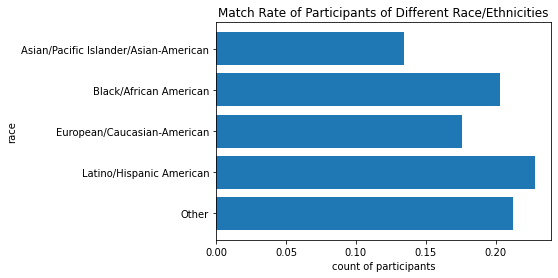

In [ ]:
plt.barh(y="race_Name", width="match",data=Race_match.sort_values("race_Name"))
plt.xlabel("count of participants")
plt.ylabel('race')
plt.title('Match Rate of Participants of Different Race/Ethnicities')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
Dating_clean["gender_Name"]=Dating_clean.gender.map({0:"female",1:"male"})
Dating_clean["race_Name"]=Dating_clean.race.map({1:"Black/African American",2:"European/Caucasian-American",3:"Latino/Hispanic American",
                                                 4:"Asian/Pacific Islander/Asian American", 5:"Native American", 6:"Other"})
Dating_revised=Dating_clean[["race_Name","gender_Name"
,"match","samerace"]].groupby(by=["race_Name","gender_Name"]).mean().reset_index()
Dating_revised

,race_Name,gender_Name,match,samerace
0,Asian/Pacific Islander/Asian American,female,0.140,0.196
1,Asian/Pacific Islander/Asian American,male,0.127,0.231
2,Black/African American,female,0.210,0.033
3,Black/African American,male,0.191,0.053
4,European/Caucasian-American,female,0.161,0.624
5,European/Caucasian-American,male,0.189,0.555
6,Latino/Hispanic American,female,0.273,0.064
7,Latino/Hispanic American,male,0.175,0.075
8,Other,female,0.264,0.110
9,Other,male,0.173,0.085


### Match rate by Gender and Race

In [ ]:
fig = px.bar(Dating_revised, x='race_Name', y='match', 
             color='gender_Name', barmode='group',labels={'match':'March Rate','race_Name':'Race'})
fig.update_layout(title='Match Rate by Gender and Race')

### Match rate of Asian Men and white men in histogram

 .  Asian Males' match rate by counts


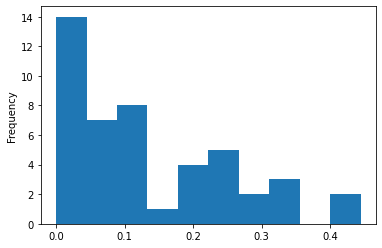

In [ ]:
Dating_clean.query('race_Name=="Asian/Pacific Islander/Asian American" and gender_Name=="male"')["match"].plot.hist(bins=10)
print(" .  Asian Males' match rate by counts")

 .  White Males' match rate by counts


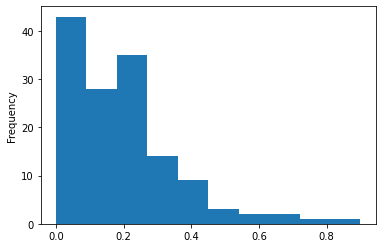

In [ ]:
 Dating_clean.query('race_Name=="European/Caucasian-American" and gender_Name=="male"')["match"].plot.hist(bins=10)
print(" .  White Males' match rate by counts")

### Match rate of Asian men and white men in Density Plot

Text(0.5, 1.0, 'Density Plot of match rate of Asian men and White men')

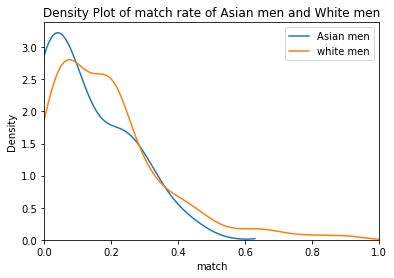

In [ ]:
x=Dating_clean.query('race_Name=="Asian/Pacific Islander/Asian American" and gender_Name=="male"')["match"]
y=Dating_clean.query('race_Name=="European/Caucasian-American" and gender_Name=="male"')["match"]
plt.xlim(0, 1)
sns.distplot(x,hist=False,label="Asian men").set_ylabel('Density')
sns.distplot(y,hist=False, label="white men").set_title('Density Plot of match rate of Asian men and White men')

###  Levene’s test--test of the difference

I use the Levene's test to test the difference since both are non-normal distributions.

In [ ]:
descriptives, results = rp.ttest(Dating_clean.query('race_Name=="Asian/Pacific Islander/Asian American" and gender_Name=="male"')["match"], 
                                 Dating_clean.query('race_Name=="European/Caucasian-American" and gender_Name=="male"')["match"])

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,match,46.000,0.127,0.125,0.018,0.090,0.164
1,match,138.000,0.189,0.168,0.014,0.161,0.217
2,combined,184.000,0.173,0.160,0.012,0.150,0.197


In [ ]:
results

,Independent t-test,results
0,Difference (match - match) =,-0.062
1,Degrees of freedom =,182.000
2,t =,-2.305
3,Two side test p value =,0.022
4,Difference < 0 p value =,0.011
5,Difference > 0 p value =,0.989
6,Cohen's d =,-0.393
7,Hedge's g =,-0.391
8,Glass's delta =,-0.497
9,r =,0.168


In [ ]:
stats.levene(Dating_clean.query('race_Name=="Asian/Pacific Islander/Asian American" and gender_Name=="male"')["match"], 
                                 Dating_clean.query('race_Name=="European/Caucasian-American" and gender_Name=="male"')["match"])

LeveneResult(statistic=1.3758951948820026, pvalue=0.24233448843117253)

As p > 0.05 the data sets conform to the variance criterion

In [ ]:
t, p = stats.ttest_ind(Dating_clean.query('race_Name=="Asian/Pacific Islander/Asian American" and gender_Name=="male"')["match"], 
                                 Dating_clean.query('race_Name=="European/Caucasian-American" and gender_Name=="male"')["match"])
t, p

(-2.305180149239645, 0.02228463534054921)

Match rates were higher for white men (M = .189 SD = .168) than for Asian men (M = .127, SD = .123), t(340) = 2.3, p < .05. Levene’s test indicated unequal variances (F = 1.38, p = .24).

### Conclusion 
1. There are significant match rate difference between Asian men and white men, while Asian men has lowest match rate. 

2. Asian men do not have match rate above 0.5. Compared to white men, no Asian men are not perceived super charming in this speed dating experiment. There seem to be “glass ceiling” for Asian men to find many matches. 

3. This specific hyphothesis is tested and can support the sociology explanation of conflicted identities.

## Presentation Flow
7 minutes in total:

2 min: intro (1 min why it matters; 1 min what is this analysis about)

2 min: variable & methods

2 min: visualization

1 min: conclusion and further findings